<a href="https://colab.research.google.com/github/talw98/IMAGE-CLASSIFIER-USING-PYTORCH-END-TO-END-PROJECT-/blob/main/Image_Classifier_using_PyTorch_and_Comet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Dependencies

In [ ]:
%pip install "comet_ml>=3.38.0" torch torchvision tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 632.4/632.4 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.8/258.8 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 514.7/514.7 kB 34.9 MB/s eta 0:00:00
  Attempting uninstall: websocket-client
    Found existing installation: websocket-client 1.7.0
    Uninstalling websocket-client-1.7.0:
      Successfully uninstalled websocket-client-1.7.0
  Attempting uninstall: python-box
    Found existing installation: python-box 7.1.1
    Uninstalling python-box-7.1.1:
      Successfully uninstalled python-box-7.1.1


# Initialize Comet

In [ ]:
import comet_ml
from comet_ml.integration.pytorch import watch

comet_ml.init(project_name="Image Classifier of Dogs and Cats")

Please paste your Comet API key from https://www.comet.com/api/my/settings/
(api key may not show as you type)
Comet API key: ··········


COMET INFO: Valid Comet API Key saved in /root/.comet.config (set COMET_CONFIG to change where it is saved).


# Import Dependencies

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.autograd import Variable
from tqdm import tqdm

# Define Parameters

In [ ]:
hyper_params = {"batch_size": 100, "num_epochs": 3, "learning_rate": 0.01}
experiment = comet_ml.Experiment()
experiment.log_parameters(hyper_params)
experiment.log_code()

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.
COMET INFO: Experiment is live on comet.com https://www.comet.com/talw98/image-classifier-of-dogs-and-cats/a01907a75dae4790af9a1d51e5c1c0e8

COMET WARNING: unable to find caller source code in a jupyter notebook; ignoring


# Load Data

In [ ]:
!pip install opendatasets --upgrade --quiet
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/tongpython/cat-and-dog'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: talhawaqas
Your Kaggle Key: ··········


100%|██████████| 218M/218M [00:03<00:00, 70.0MB/s]


In [ ]:
image_path = "/content/cat-and-dog"
train_dir = f"{image_path}/training_set/training_set"
test_dir = f"{image_path}/test_set/test_set"

In [ ]:
from torchvision import transforms
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)

#creating training transform with TrivialAugment
train_transform = transforms.Compose([
    transforms.Resize(IMAGE_SIZE),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()])

#create test transform with no data augmentation
test_transform = transforms.Compose([
    transforms.Resize(IMAGE_SIZE),
    transforms.ToTensor()])


In [ ]:
import os
from torch.utils.data import DataLoader
from torchvision import datasets

#Turn image folders into datasets
train_data = datasets.ImageFolder(train_dir, transform = train_transform)
test_data = datasets.ImageFolder(test_dir, transform = test_transform)

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
torch.manual_seed(42)

train_dataloader = DataLoader(train_data, batch_size = BATCH_SIZE, shuffle=True, num_workers = NUM_WORKERS)
test_dataloader = DataLoader(test_data, batch_size = BATCH_SIZE, shuffle = True, num_workers = NUM_WORKERS)

Random image path: /content/cat-and-dog/training_set/training_set/cats/cat.3750.jpg
Image class: cats
Image height: 299
Image width: 400


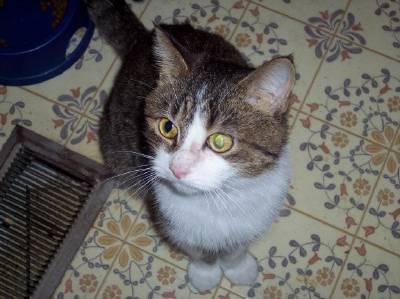

In [ ]:
import random
from PIL import Image
import glob
from pathlib import Path

#set seed
random.seed(42)

#1. get all image paths
image_path_list = glob.glob(f'{image_path}/*/*/*/*.jpg')

#get random image path
random_image_path = random.choice(image_path_list)

#get image_class from path name
image_class = Path(random_image_path).parent.stem

#open image
img = Image.open(random_image_path)

#Print the data
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

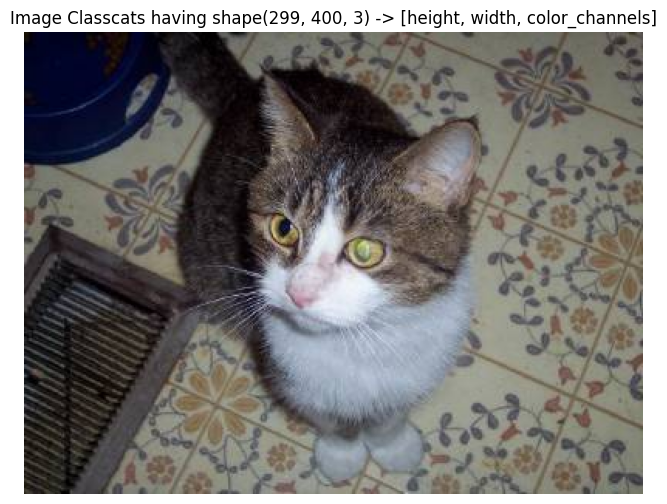

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#turn image into an arry
image_as_array = np.asarray(img)

#plotting the table with matplotlib
plt.figure(figsize=(8,6))
plt.imshow(image_as_array)
plt.title(f'Image Class{image_class} having shape{image_as_array.shape} -> [height, width, color_channels]')
plt.axis(False);

## DEFINE A CONVULATIONAL NEURAL NETWORK



In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
class ImageClassifier(nn.Module):

    def __init__(self):
        super().__init__()
        self.conv_layer_1 = nn.Sequential(
          nn.Conv2d(3, 64, 3, padding=1),
          nn.ReLU(),
          nn.BatchNorm2d(64),
          nn.MaxPool2d(2))
        self.conv_layer_2 = nn.Sequential(
          nn.Conv2d(64, 512, 3, padding=1),
          nn.ReLU(),
          nn.BatchNorm2d(512),
          nn.MaxPool2d(2))
        self.conv_layer_3 = nn.Sequential(
          nn.Conv2d(512, 512, kernel_size=3, padding=1),
          nn.ReLU(),
          nn.BatchNorm2d(512),
          nn.MaxPool2d(2))
        self.classifier = nn.Sequential(
          nn.Flatten(),
           nn.Linear(in_features=512*3*3, out_features=2)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_layer_1(x)
        x = self.conv_layer_2(x)
        x = self.conv_layer_3(x)
        x = self.conv_layer_3(x)
        x = self.conv_layer_3(x)
        x = self.conv_layer_3(x)
        x = self.classifier(x)
        return x
model = ImageClassifier().to(device)

In [ ]:
# Install torchinfo if it's not available, import it if it is
try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo

from torchinfo import summary
summary(model, input_size=[1, 3, IMAGE_WIDTH ,IMAGE_HEIGHT])

Layer (type:depth-idx)                   Output Shape              Param #
ImageClassifier                          [1, 2]                    --
├─Sequential: 1-1                        [1, 64, 112, 112]         --
│    └─Conv2d: 2-1                       [1, 64, 224, 224]         1,792
│    └─ReLU: 2-2                         [1, 64, 224, 224]         --
│    └─BatchNorm2d: 2-3                  [1, 64, 224, 224]         128
│    └─MaxPool2d: 2-4                    [1, 64, 112, 112]         --
├─Sequential: 1-2                        [1, 512, 56, 56]          --
│    └─Conv2d: 2-5                       [1, 512, 112, 112]        295,424
│    └─ReLU: 2-6                         [1, 512, 112, 112]        --
│    └─BatchNorm2d: 2-7                  [1, 512, 112, 112]        1,024
│    └─MaxPool2d: 2-8                    [1, 512, 56, 56]          --
├─Sequential: 1-3                        [1, 512, 28, 28]          --
│    └─Conv2d: 2-9                       [1, 512, 56, 56]          2,359,

In [ ]:
# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_dataloader))

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

# 3. Perform a forward pass on a single image
model.eval()
with torch.inference_mode():
    pred = model(img_single.to(device))

# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 224, 224])

Output logits:
tensor([[-0.0096, -0.0092]], device='cuda:0')

Output prediction probabilities:
tensor([[0.4999, 0.5001]], device='cuda:0')

Output prediction label:
tensor([1], device='cuda:0')

Actual label:
1


In [ ]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=1e-4)

## CREATE TRAIN AND TEST LOOP FUNCTIONS


In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()
    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0
    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)
        # 1. Forward pass
        y_pred = model(X)
        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        # 3. Optimizer zero grad
        optimizer.zero_grad()
        # 4. Loss backward
        loss.backward()
        # 5. Optimizer step
        optimizer.step()
        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)
    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [ ]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()
    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0
    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)
            # 1. Forward pass
            test_pred_logits = model(X)
            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

creating a train fucntion to combine train_step() and test_step()

In [ ]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
    # 2. Create empty results dictionary
    results = {"train_loss": [], "train_acc": [], "test_loss": [], "test_acc": []}
    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
                                        dataloader=test_dataloader,
                                        loss_fn=loss_fn)
        # 4. Print out what's happening
        print(f"Epoch: {epoch+1} | "
              f"train_loss: {train_loss:.4f} | "
              f"train_acc: {train_acc:.4f} | "
              f"test_loss: {test_loss:.4f} | "
              f"test_acc: {test_acc:.4f}" )
         # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results


## TRAIN AND EVALUATE THE MODEL


In [ ]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 20

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_results = train(model=model,
                      train_dataloader=train_dataloader,
                      test_dataloader=test_dataloader,
                      optimizer=optimizer,
                      loss_fn=loss_fn,
                      epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.6693 | train_acc: 0.6505 | test_loss: 0.5395 | test_acc: 0.7263
Epoch: 2 | train_loss: 0.5913 | train_acc: 0.6959 | test_loss: 0.5210 | test_acc: 0.7428
Epoch: 3 | train_loss: 0.5349 | train_acc: 0.7373 | test_loss: 0.5217 | test_acc: 0.7455
Epoch: 4 | train_loss: 0.4868 | train_acc: 0.7702 | test_loss: 0.4722 | test_acc: 0.7695


COMET WARNING: Failed to log system metrics: [sys.ram,sys.cpu,sys.load]


Epoch: 5 | train_loss: 0.4576 | train_acc: 0.7840 | test_loss: 0.4506 | test_acc: 0.7805
Epoch: 6 | train_loss: 0.4067 | train_acc: 0.8134 | test_loss: 0.3620 | test_acc: 0.8408
Epoch: 7 | train_loss: 0.3792 | train_acc: 0.8250 | test_loss: 0.3146 | test_acc: 0.8620
Epoch: 8 | train_loss: 0.3385 | train_acc: 0.8415 | test_loss: 0.3427 | test_acc: 0.8438
Epoch: 9 | train_loss: 0.3055 | train_acc: 0.8620 | test_loss: 0.2815 | test_acc: 0.8820
Epoch: 10 | train_loss: 0.2816 | train_acc: 0.8733 | test_loss: 0.2681 | test_acc: 0.8862
Epoch: 11 | train_loss: 0.2552 | train_acc: 0.8832 | test_loss: 0.3014 | test_acc: 0.8754
Epoch: 12 | train_loss: 0.2197 | train_acc: 0.9054 | test_loss: 0.2409 | test_acc: 0.9006
Epoch: 13 | train_loss: 0.2091 | train_acc: 0.9067 | test_loss: 0.2239 | test_acc: 0.9131
Epoch: 14 | train_loss: 0.1939 | train_acc: 0.9141 | test_loss: 0.2478 | test_acc: 0.8959
Epoch: 15 | train_loss: 0.1971 | train_acc: 0.9157 | test_loss: 0.2130 | test_acc: 0.9211
Epoch: 16 | tra

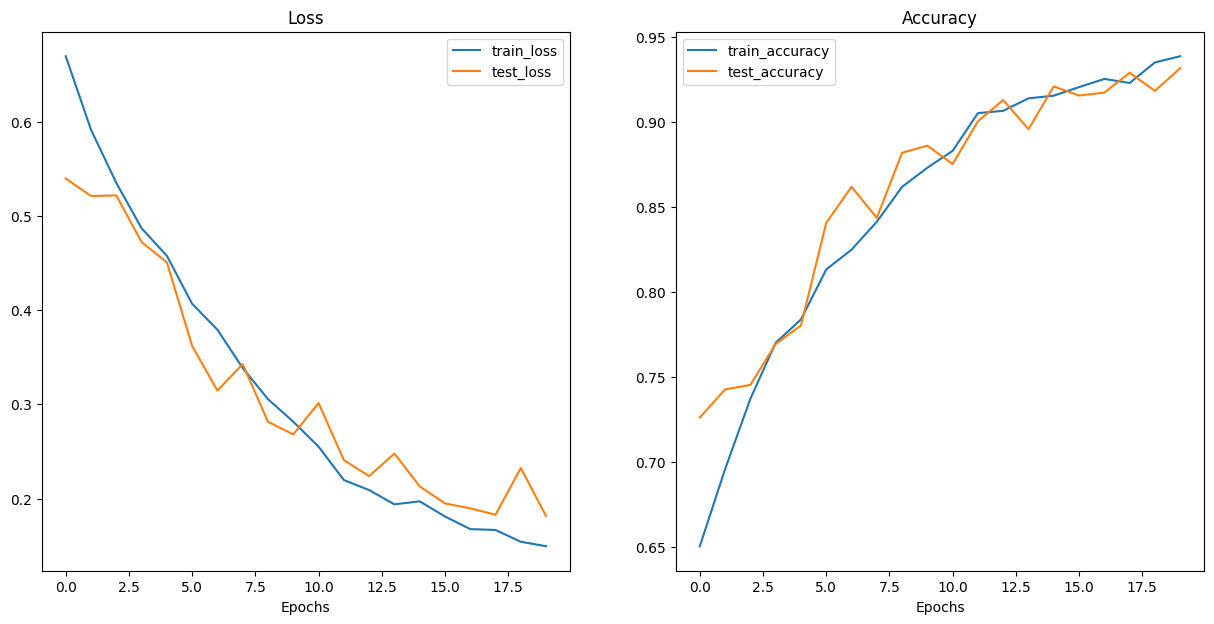

In [ ]:
def plot_loss_curves(results):

    results = dict(list(model_results.items()))
    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();
plot_loss_curves(model_results)

## MAKE PREDICTION

In [ ]:
import torchvision
custom_image_path = f"{image_path}/test_set/test_set/cats/cat.4012.jpg"
class_names = train_data.classes
# Load in custom image and convert the tensor values to float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)
custom_image = custom_image / 255.
custom_image_transform = transforms.Compose([
    transforms.Resize(IMAGE_SIZE),
])
# Transform target image
custom_image_transformed = custom_image_transform(custom_image)

with torch.no_grad():
    # Make a prediction on image with an extra dimension
    custom_image_pred = model(custom_image_transformed.unsqueeze(dim=0).to(device))
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
print(custom_image_pred_probs )
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
print(custom_image_pred_label)
custom_image_pred_class = class_names[custom_image_pred_label.cpu()] # put pred label to CPU, otherwise will error
custom_image_pred_class

tensor([[0.7048, 0.2952]], device='cuda:0')
tensor([0], device='cuda:0')


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


'cats'

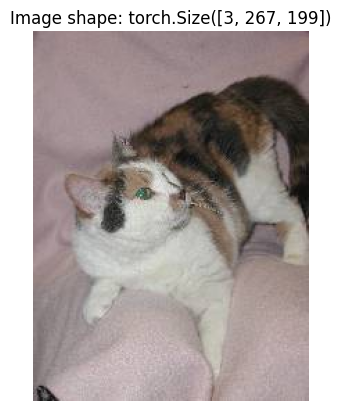

In [ ]:
plt.imshow(custom_image.permute(1, 2, 0)) # need to permute image dimensions from CHW -> HWC otherwise matplotlib will error
plt.title(f"Image shape: {custom_image.shape}")
plt.axis(False)
plt.show()


# End Experiment

In [ ]:
experiment.end()

COMET WARNING: Couldn't retrieve Google Colab notebook content
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/talw98/image-classifier-of-dogs-and-cats/a01907a75dae4790af9a1d51e5c1c0e8
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     loss [502] : (0.038541339337825775, 1.2114894390106201)
COMET INFO:   Parameters:
COMET INFO:     batch_size    : 100
COMET INFO:     learning_rate : 0.01
COMET INFO:     num_epochs    : 3
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     installed packages  : 1
COMET INFO:     model graph         : 1
COMET INFO:     notebook            : 1
COMET INFO:     os packages  

##DEPLOYING THE MODEL AS AN APPLICATION USING GRADIO

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.7/310.7 kB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 89.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 11.6 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl 

In [ ]:

import gradio as gr
# Creating a function for prediction
def predict(inp):
    image_transform = transforms.Compose([ transforms.Resize(size=(224,224)), transforms.ToTensor()])
    labels = ['cat', 'dog']
    inp = image_transform(inp).unsqueeze(dim=0)
    with torch.no_grad():
        prediction = torch.nn.functional.softmax(model(inp))
        confidences = {labels[i]: float(prediction.squeeze()[i]) for i in range(len(labels))}
    return confidences

# Building an interface
gr.Interface(fn=predict,
             inputs=gr.Image(type="pil"),
             outputs=gr.Label(num_top_classes=2),
             title='IMAGE CLASSIFIER FOR DOGS AND CATS',
             description='Image Classifier app made by Muhammad Talha Waqas powered by PyTorch.',
             examples=['cat.jpg', 'dog.jpg']).launch()